In [13]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('news-utf8.tsv', sep='\t')

In [6]:
df['text'] = df['text'].astype(str)

In [7]:
print(df.dtypes)

id        int64
title    object
text     object
label    object
dtype: object


In [ ]:


# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Determine sentiment polarity (positive, neutral, negative)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis to each row in the DataFrame
df['Sentiment'] = df['text'].apply(analyze_sentiment)

In [12]:


# Function to perform sentiment analysis using TextBlob and return scores
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Extract sentiment polarity and subjectivity scores
    polarity = analysis.sentiment.polarity
    subjectivity = analysis.sentiment.subjectivity
    return polarity, subjectivity

# Apply sentiment analysis to each row in the DataFrame and store scores in separate columns
df[['Polarity', 'Subjectivity']] = df['text'].apply(analyze_sentiment).apply(pd.Series)

# Print the DataFrame with sentiment scores
df.head(20)




,id,title,text,label,Sentiment,Polarity,Subjectivity
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,Positive,0.059595,0.562654
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,Positive,0.082652,0.518638
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,Positive,0.102574,0.348775
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,Positive,0.063645,0.503563
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,Positive,0.251709,0.420109
5,6903,"Tehran, USA","\r\nI’m not an immigrant, but my grandparent...",FAKE,Positive,0.074300,0.421152
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE,Positive,0.066060,0.383248
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL,Positive,0.034375,0.318750
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL,Positive,0.010431,0.412183
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL,Positive,0.041350,0.401825


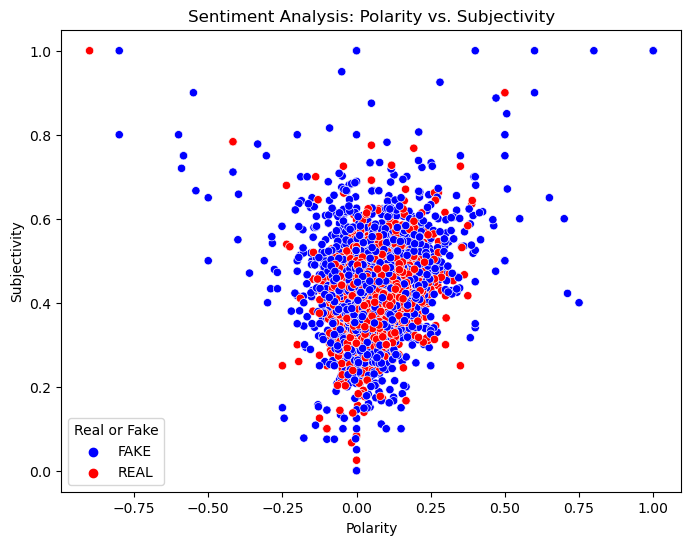

In [15]:
# Create a scatterplot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Polarity', y='Subjectivity', hue='label', data=df, palette=['blue', 'red'])

# Set labels and title
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Sentiment Analysis: Polarity vs. Subjectivity')

# Show the legend
plt.legend(title='Real or Fake')

# Display the scatterplot
plt.show()